In [1]:
import json
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data/countries.json', 'r') as fout:
    countries = json.load(fout)

In [5]:
countries['India'][:20]

['India',
 'Hindi',
 'Bhārat',
 'officially',
 'the',
 'Republic',
 'of',
 'India',
 'Hindi',
 'Bhārat',
 'Gaṇarājya',
 'is',
 'a',
 'country',
 'in',
 'South',
 'Asia',
 'It',
 'is',
 'the']

In [6]:
print(' '.join(countries['India']))

India Hindi Bhārat officially the Republic of India Hindi Bhārat Gaṇarājya is a country in South Asia It is the second most populous country the seventh largest country by land area and the most populous democracy in the world Bounded by the Indian Ocean on the south the Arabian Sea on the southwest and the Bay of Bengal on the southeast it shares land borders with Pakistan to the west China Nepal and Bhutan to the north and Bangladesh and Myanmar to the east In the Indian Ocean India is in the vicinity of Sri Lanka and the Maldives its Andaman and Nicobar Islands share a maritime border with Thailand and Indonesia Modern humans arrived on the Indian subcontinent from Africa no later than 55 000 years ago Their long occupation initially in varying forms of isolation as hunter gatherers has made the region highly diverse second only to Africa in human genetic diversity Settled life emerged on the subcontinent in the western margins of the Indus river basin 9 000 years ago evolving gradu

In [41]:
from gensim.models.callbacks import CallbackAny2Vec

class MetricCallback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.myloss = []
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            self.myloss.append(loss)
        else:
            self.myloss.append(loss - self.loss_previous_step)
        if self.epoch % 10 == 0:
            print(f'Loss after epoch {self.epoch}: {self.myloss[-1]}')
        self.epoch += 1
        self.loss_previous_step = loss

Loss after epoch 0: 515622.46875
Loss after epoch 10: 257285.25
Loss after epoch 20: 222928.0
Loss after epoch 30: 207875.5
Loss after epoch 40: 201653.0
Loss after epoch 50: 197838.0
Loss after epoch 60: 190358.0
Loss after epoch 70: 186174.0
Loss after epoch 80: 135826.0
Loss after epoch 90: 129028.0


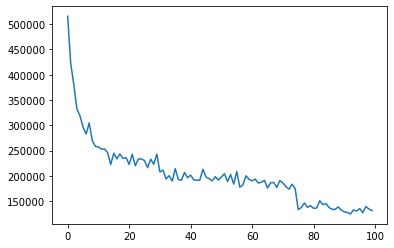

In [43]:
cb = MetricCallback()

model = Word2Vec(
    sentences=countries.values(),
    min_count=10,
    vector_size=128,
    window=3,
    workers=9,
    compute_loss=True,
    min_alpha=0.0001,
    callbacks=[cb],
    epochs=100
)
plt.plot(cb.myloss)

In [88]:
model.wv.most_similar('India')

[('China', 0.6427158117294312),
 ('Nepal', 0.6162323951721191),
 ('Pakistan', 0.5821033716201782),
 ('Indonesia', 0.5816282629966736),
 ('Vietnam', 0.5429593324661255),
 ('Nigeria', 0.5341227054595947),
 ('Bhutan', 0.5295361280441284),
 ('Singapore', 0.5252336859703064),
 ('Malaysia', 0.5208200812339783),
 ('Africa', 0.5082598328590393)]

In [82]:
countries = ['India', 'Pakistan', 'Bangladesh', 'France', 'England', 'Spain']
capitals = ['Delhi', 'Islamabad', 'Dhaka', 'Paris', 'London', 'Madrid']
X = model.wv[countries+capitals]

In [76]:
from sklearn.decomposition import PCA

In [83]:
tsne = PCA(n_components=2)
x_red = tsne.fit_transform(X)

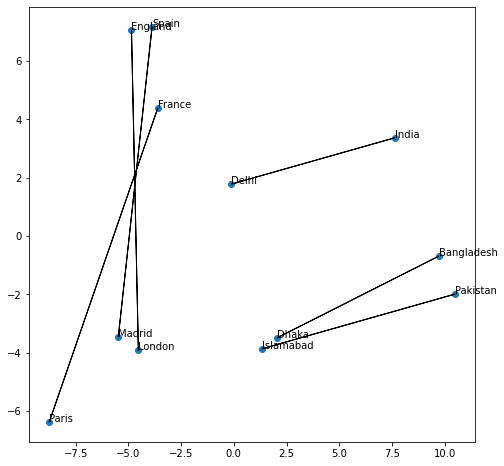

In [87]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(*x_red.T)
for i, word in enumerate(countries + capitals):
    plt.annotate(word, x_red[i])
XCountry = x_red[:6]
XCapitals = x_red[6:]
for i, (country, capital) in enumerate(zip(countries, capitals)):
    x1, y1 = XCountry[i]
    x2, y2 = XCapitals[i]
    plt.arrow(x1, y1, x2 - x1, y2 - y1)